# DeedTree Inference Notebook

In [195]:
from deadtrees.network.segmodel import SemSegment
from deadtrees.data.deadtreedata import DeadtreesDataModule, inv_normalize, DeadtreeDatasetConfig

from deadtrees.visualization.helper import show

import hydra
from omegaconf import DictConfig, OmegaConf

import torch
import numpy as np

In [196]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load a model from checkpoint

> **TODOs:**   
> - add a model to dvc under `./checkpoints/`
> - automate the registration (and dvc add) of current *default* model

In [3]:
MODEL_CHECKPOINT_PATH = "../logs/runs/2021-05-03/15-01-16/checkpoints/epoch=169.ckpt"

In [4]:
# load model and set to eval
model = SemSegment.load_from_checkpoint(MODEL_CHECKPOINT_PATH)
model.eval();

## Initialize Lightning DataModule 

... use the generic conf constructor from hydra for now.

> **TODO:**  
> - make this simpler 
> - work with source test tile (8kx8k)

In [191]:
conf = OmegaConf.load('../conf/datamodule/deadtrees.yaml')
# modify test loader to run single samples
conf.datamodule.test_dataloader_conf.batch_size = 1
conf.datamodule.test_dataloader_conf.num_workers = 0

datamodule  = hydra.utils.instantiate(
    conf.datamodule,
    data_dir="../data/dataset/train_balanced_short",
    pattern="train-balanced-short-*.tar",
)
datamodule.setup()

Unexpected shard distribution encountered - trying to fix this
New shard split: [['../data/dataset/train_balanced_short/train-balanced-short-000000.tar', '../data/dataset/train_balanced_short/train-balanced-short-000001.tar', '../data/dataset/train_balanced_short/train-balanced-short-000002.tar', '../data/dataset/train_balanced_short/train-balanced-short-000003.tar', '../data/dataset/train_balanced_short/train-balanced-short-000004.tar', '../data/dataset/train_balanced_short/train-balanced-short-000005.tar', '../data/dataset/train_balanced_short/train-balanced-short-000006.tar', '../data/dataset/train_balanced_short/train-balanced-short-000007.tar', '../data/dataset/train_balanced_short/train-balanced-short-000008.tar'], ['../data/dataset/train_balanced_short/train-balanced-short-000009.tar'], ['../data/dataset/train_balanced_short/train-balanced-short-000010.tar']]
Shard size: 64 (estimate base on file: ../data/dataset/train_balanced_short/train-balanced-short-000000.tar)


# Check the model on the first 3 images if this testset shard

| Symbol      | Description            |
| :-----------|:---------------------- |
| **X**       | Input                  | 
| **X_mask**  | Input (incl. mask/ GT) |
| **y**       | Groundtruth            |
| **ŷ**       | Model prediction       |

{'file': 'ortho_2019_ESPG3044_33_11_113', 'frac': 12.58}


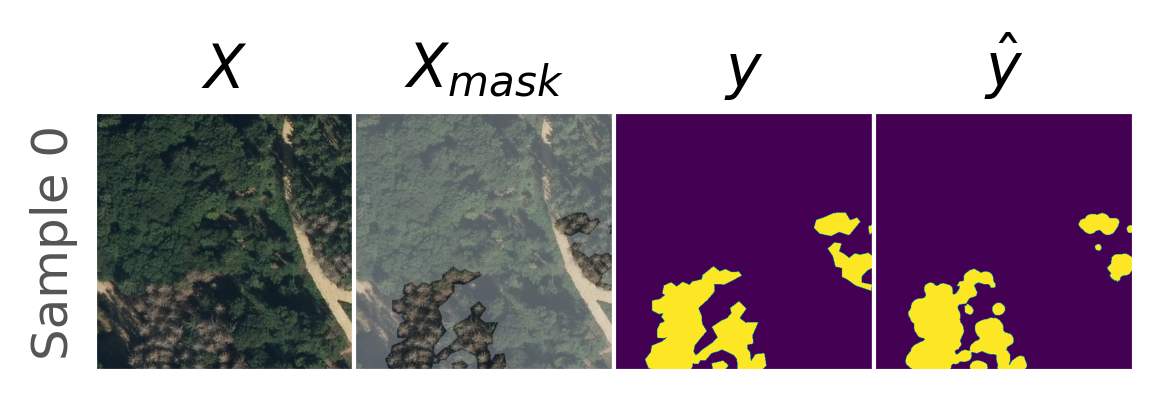

{'file': 'ortho_2019_ESPG3044_34_11_006', 'frac': 6.61}


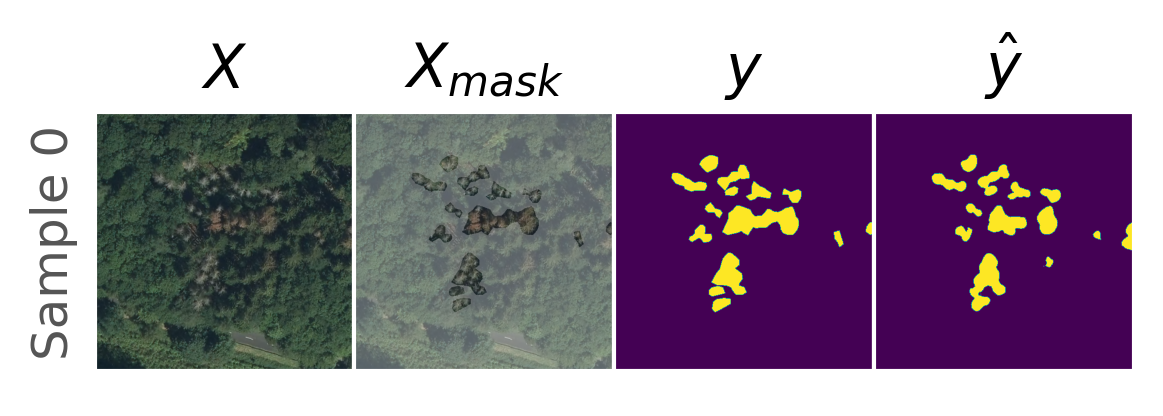

{'file': 'ortho_2019_ESPG3044_33_13_113', 'frac': 5.25}


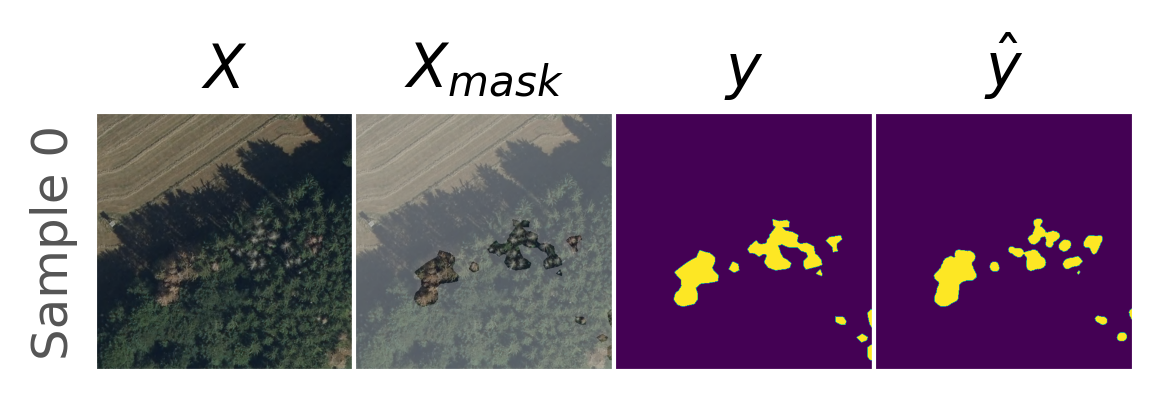

In [197]:
for cnt, (x, y, stats) in enumerate(datamodule.test_dataloader()):
    if cnt == 3:
        break
    print(stats[0])
    y_hat = model(x)
    show(x=x, y=y, y_hat=y_hat, dpi=300)